In [1]:
%matplotlib inline 
!pip install -q matplotlib_venn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2
from itertools import *
from random import *

In [3]:
from fractions import Fraction 

# pretty fractions
Fraction.__repr__ = Fraction.__str__
html_formatter = get_ipython().display_formatter.formatters['text/latex']
html_formatter.for_type(Fraction, lambda f: r"$\frac{%s}{%s}$" % (f.numerator, f.denominator));

In [4]:
from matplotlib_venn import venn2

# pretty sets
def plot_set(*sets):
    venn2(sets)
    plt.show()
    return None

# Exercise: Mathematics -- Probability & Statistics

## Probability Questions

* define the function `probability(event, space)` which returns the probability that event occurs 

* define a set of outcomes (using `{,}`) for:
    * `one_coin`: a single coin flip
    * `two_coin`: two coin flips (HINT: each element is a pair)
    * `one_dice`: a single dice roll
    * `two_dice`: two dice rolls
        * define this using a set comprehension
`{(first, second) for first in one_dice for second in one_dice}`
        
* by manually writing out the event sets:
    * what is the probability of:
        * an odd number in one dice roll
        * heads in one coin flip
        * heads in either coin, of two coin flips

* EXTRA:
* by generating the event set using a set comprehension:
    * what is the probability of:
        * getting a 6 on the second roll of a dice?
        * getting a Tail on the first flip of a coin?

HINT: `event_second6 = { e for e in outcomes if ...e...}`

* define `P(predicate, space)` where `predicate` is a function from event -> bool
    * HINT: perform the set comprehension within `P` using `predicate`
    
* call `P()` with, eg.  
    * lambda die: (die[0] in {1, 2}) and (die[1] == 6)

## Statistics Questions

Let's simulate sampling from a distribution, so that we can find out how good our samples need to be to get close to the true mean.

* define the outcome space for two dice rolls...

In [37]:
one_dice = {1,2,3,4,5,6}
two_dice = {(first, second) for first in one_dice for second in one_dice}

* define a function called `score(event)` (a random variable) which takes one event (ie., two rolls) and calculates a real number
    * eg., the average of both rolls
    
* create a list of the population of all scores
    * HINT: `[ rv(event) for event in space]`
    
* create a list of 100 samples of 10 rols 
    * HINT: `sample(pop, 10)` to sample
    * HINT: `[ ...  for _ in range(100)]`
    
* create a list of 100 sample means 
    * HINT: `sum(s)/len(s)` for every s
    
* `sns.distplot()` the sample means

* `plt.axvline(x, color="red")` the mean of the sample means
    * HINT: `sum()/len()`
    
* `plt.axvline(x, color="red")` the mean of the population

* What is the effect of taking fewer samples?


### EXTRA -- find the probability of getting a score greater than 4
* `from scipy import integrate, stats` and  use `integrate.quad(f, low, high)`
2.  use the following as the function you're integrating, 
    * `norm = lambda x : stats.norm.pdf(x, mean, std)`
    * where `mean` is the mean of your sample means, and `std` is their standard deviation
3. integrate from 4 to `np.inf`
        

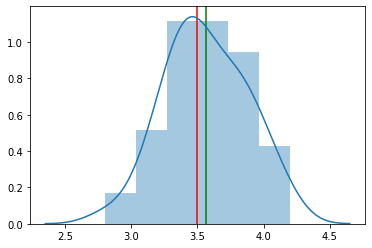

In [97]:
import seaborn as sns

def rv_score(event):
    return sum(event)/len(event)

population = [rv_score(roll) for roll in two_dice]
samples = [sample(population, 10) for _ in range(50)]
sample_means = [sum(s)/len(s) for s in samples]

plt.axvline(sum(population)/len(population), color="red")
plt.axvline(sum(sample_means)/len(sample_means), color="green")
sns.distplot(sample_means);

In [41]:
from scipy import integrate, stats

In [99]:
def norm(x):
    return stats.norm.pdf(x, sample_means.mean(), sample_means.std())


In [98]:
sample_means = np.array(sample_means)

norm = lambda x : stats.norm.pdf(x, sample_means.mean(), sample_means.std())
prob, conf = integrate.quad(norm, 4, np.inf)

f"{prob * 100:.2f} %"

'7.70 %'